# Softmax layer on MNIST - TensorFlow from scratch

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
print(mnist.train.images.shape)
print(mnist.test.images.shape)
print(mnist.validation.images.shape)


(55000, 784)
(10000, 784)
(5000, 784)


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

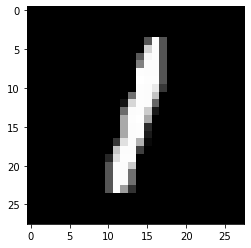

In [4]:
plt.imshow(mnist.train.images[23].reshape(28,28),cmap='gist_gray')

### Creating model

In [5]:
# placeholder
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape = [None, 10])

# variales
w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

#graph
y_pred = tf.matmul(x,w) + b

#loss
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_pred))

#optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.01)
train = optimizer.minimize(cross_entropy)

# initializing variables
init = tf.global_variables_initializer()



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Creating session

In [16]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range (1000):
        x_batch, y_batch = mnist.train.next_batch(100)
        sess.run(train,feed_dict = {x:x_batch,y: y_batch})
        
    matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y:mnist.test.labels}))

0.8706
